# 1er Parcial Computación 2

## Ajuste de datos

Cuando una fuente de tensión se conecta a través de una resistencia y un inductor en serie, se predice que la diferencia de potencial a través del inductor $V_i(t)$ obedece a la ecuación


$$ V(t)=V_0\mathrm{e}^{-𝜏 \ t}$$

Donde $t$ es el tiempo y $τ$ la tasa de caída es la relación entre la resistencia  $R$ y la inductancia $L$ del circuito. $\tau = \dfrac{R}{L}$

- ¿Qué unidades debe tener  $\tau$?

En base a los datos existentes en el archivo `RL_Circ.csv`

- Importar los datos a un dataframe de Pandas
- Opcional, converitr a arrays de Numpy los datos.
- Hacer un gráfico de dispersión de $V_i(t)$ que incluya las incertezas como barras de error
- Encontrar los valores que mejor ajustan a $V_0$ y $\tau$ usando `scipy.optimize`
- Hacer un gráfico de la curva con los parámetros encontrados desde el ajuste
- ¿Cambia algo si uno da valores estimados iniciales para los parámetros que se buscan?(especialmente para $\tau$)
- Los valores encontrados para $\tau$ ¿Concuerdan con lo que se observa en el gráfico inicial?
- Si la resistencia tiene un valor de 10 $kΩ$ ¿Cuál es el valor de la inductancia?
- Los valores encontrados para $V_0$ ¿Concuerdan con lo que se observa en el gráfico inicial?
- Hacer un ajuste de los datos linearizando los mismos y encontrar los parámetros  $V_0$ y $\tau$ nuevamente ¿Son los resultados consistentes con lo que encontró antes?

## Algunas lecturas recomenadadas

- [Sobre ajustes con exponenciales](https://stackoverflow.com/questions/21420792/exponential-curve-fitting-in-scipy)
- [Más sobre ajustes con exponenciales](https://swharden.com/blog/2020-09-24-python-exponential-fit/)
- [Sobre los valores estimados iniciales](https://swharden.com/blog/2020-09-24-python-exponential-fit/)
- [Incertezas en matplotlib](https://www.analyticslane.com/2022/10/17/inclusion-de-barras-de-error-en-matplotlib/)
- [Linearización de modelos exponenciales](https://jorgeyfloreth.wordpress.com/2017/04/02/linealizacion-de-modelos-no-lineales/)
- [Video: Liniearización de modelox exponenciales](https://www.youtube.com/watch?v=EoynVP3jkHA)

In [1]:
import scipy.optimize as op
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos =pd.read_csv('/content/drive/MyDrive/Docente/INSPT/Computación 2/Guías de ejercicios/RL_Circ.csv', sep=";")

In [ ]:
datos

,time (ns),voltage (volts),uncertainty (volts)
0,0.0,5.0800,0.11200
1,32.8,3.2900,0.09040
2,65.6,2.2300,0.07430
3,98.4,1.4800,0.06050
4,131.2,1.1100,0.05250
5,164.0,0.6440,0.04000
6,196.8,0.4760,0.03430
7,229.6,0.2730,0.02600
8,262.4,0.1880,0.02160
9,295.2,0.1410,0.01870


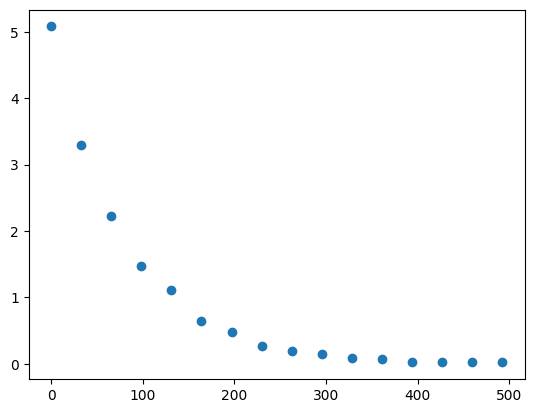

In [ ]:
plt.scatter(datos['time (ns)'], datos['voltage (volts)'])

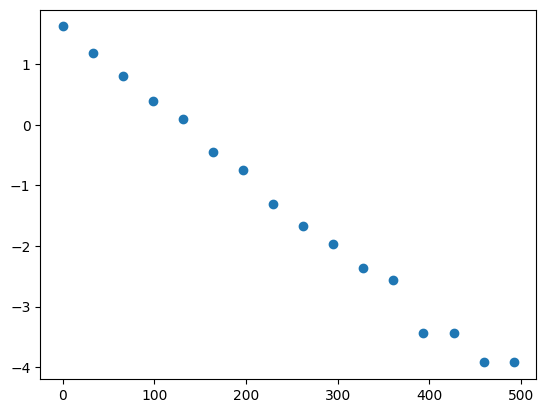

In [3]:
plt.scatter(datos['time (ns)'], np.log(datos['voltage (volts)']))

In [4]:
def linfunc(x,a,b):
  y = a*x+b
  return y

In [8]:
lparam, lcov = op.curve_fit(linfunc,datos['time (ns)'], np.log(datos['voltage (volts)']))

In [11]:
lparam
b = np.exp(lparam[1])
b

4.706825445871628

In [ ]:
def myfunc(t,T,V0):
  """
  t: tiempo
  T: tau
  V0: dif. de potencial inicial
  """
  V = V0*np.e**(-T*t)
  return V

In [ ]:
params, cov = op.curve_fit(myfunc,datos['time (ns)'], datos['voltage (volts)'],p0=[0,5])

In [ ]:
params

array([0.01232256, 5.0386261 ])

<ErrorbarContainer object of 3 artists>

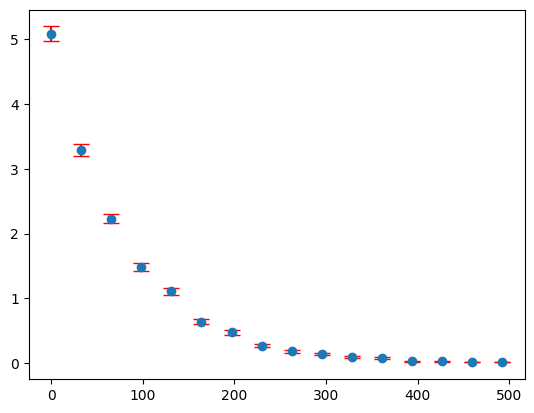

In [ ]:
fig, ax = plt.subplots()

ax.errorbar(datos['time (ns)'], datos['voltage (volts)'],yerr=datos['uncertainty (volts)'],fmt='o', ecolor='red',capsize=6)